<a href="https://colab.research.google.com/github/RageshRathod/Machine-Learning/blob/main/Breast_Cancer_Machine_Learning_Classifiacation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Model is used for Predicting person is Having Breast Cancer or Not.
# In this model we need a numerical data only. In Numeraical Data we need Dependant Variable column at the end.

# Importing the Libraries for the Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [ ]:
dataset = pd.read_csv('Data.csv') # Please Upload the Dataset (Write Name)
x = dataset.iloc[: , :-1].values  # Independant Variable
y = dataset.iloc[: , -1].values   # Dependant Variable

In [ ]:
x

array([[1000025,       5,       1, ...,       3,       1,       1],
       [1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]])

# Checking the Dataset

In [ ]:
dataset.sample(n=10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
293,659642,10,8,4,4,4,10,3,10,4,4
36,1081791,6,2,1,1,1,1,7,1,1,2
644,1339781,1,1,1,1,2,1,2,1,1,2
190,1213375,8,4,4,5,4,7,7,8,2,2
227,1232225,10,4,5,5,5,10,4,1,1,4
25,1066373,3,2,1,1,1,1,2,1,1,2
265,428903,7,2,4,1,3,4,3,3,1,4
130,1180194,5,10,8,10,8,10,3,6,3,4
334,832226,3,4,4,10,5,1,3,3,1,4
222,1228311,1,1,1,1,1,1,3,1,1,2


# Checking the Missing Values in the Dataset
# Understanding the Dataset

In [ ]:
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [ ]:
dataset.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Visualisation of the Data

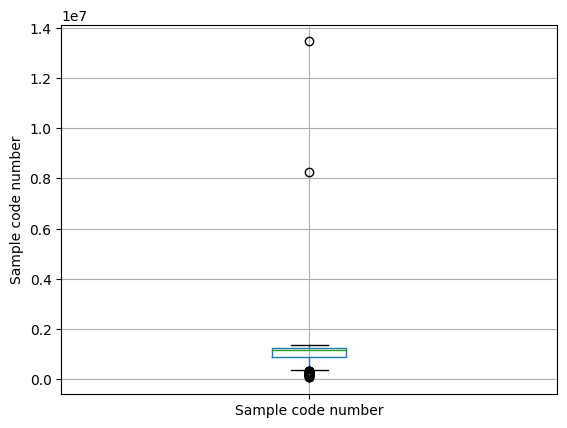

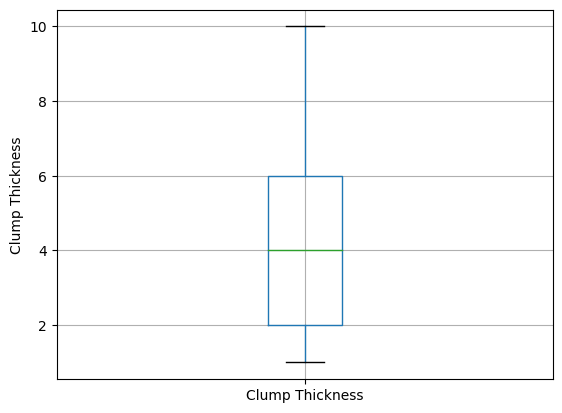

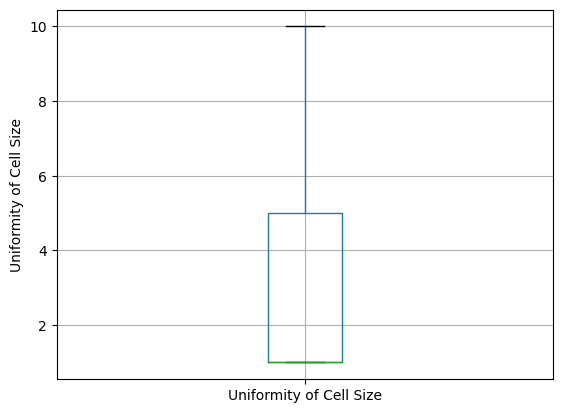

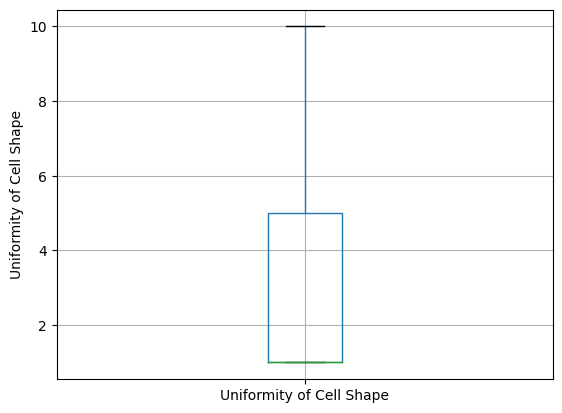

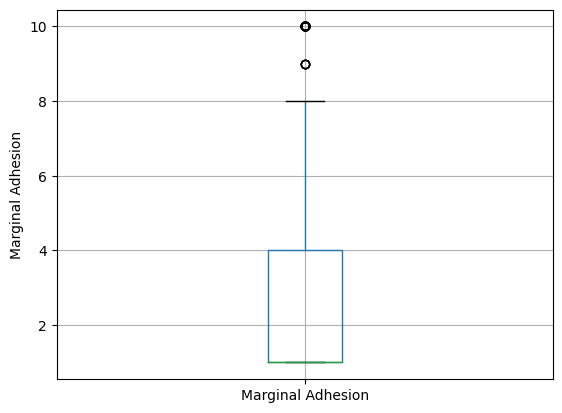

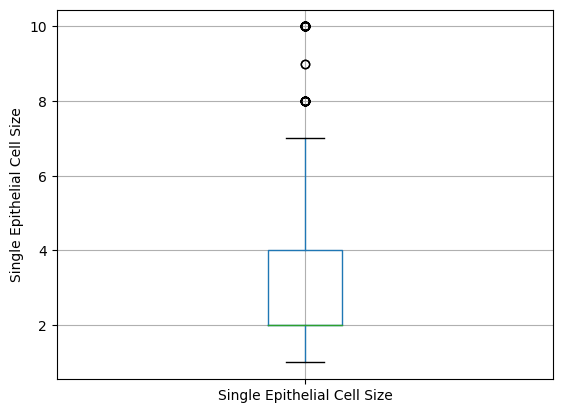

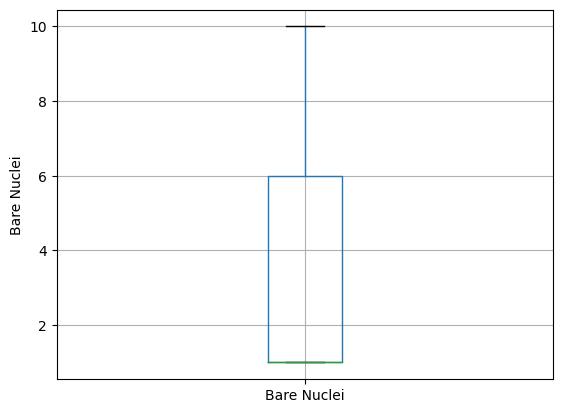

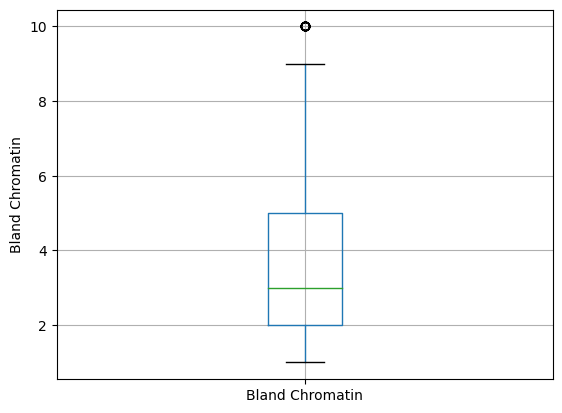

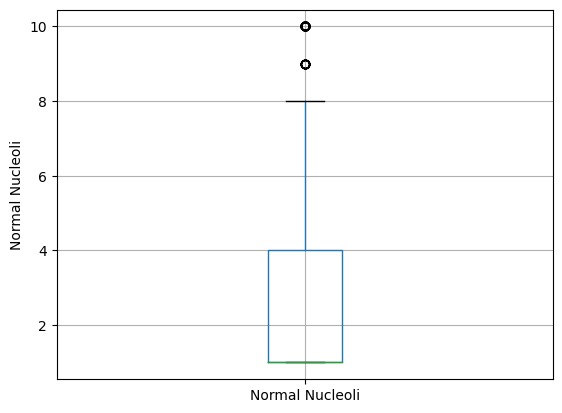

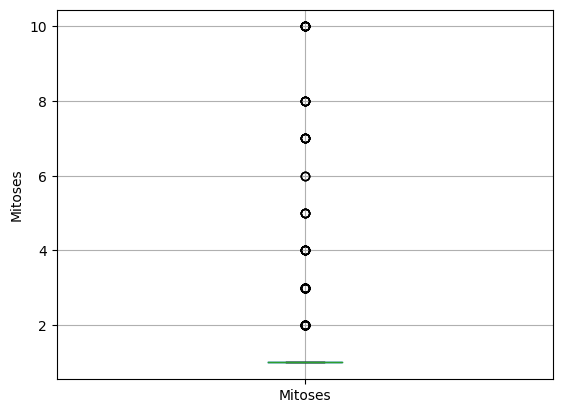

In [ ]:
x1 = dataset.iloc[: , :-1]
for i in x1:
  x1.boxplot(column=i)
  plt.ylabel(i)
  plt.show()

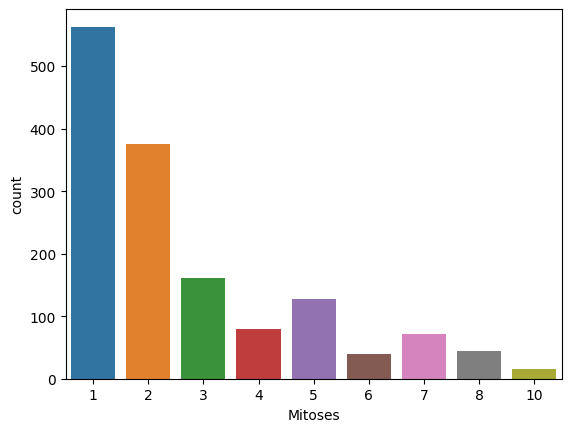

In [ ]:
for i in x1:
  sns.countplot(x=x1[i])
  plt.show

In [ ]:
y1 = dataset.iloc[ : , -1]

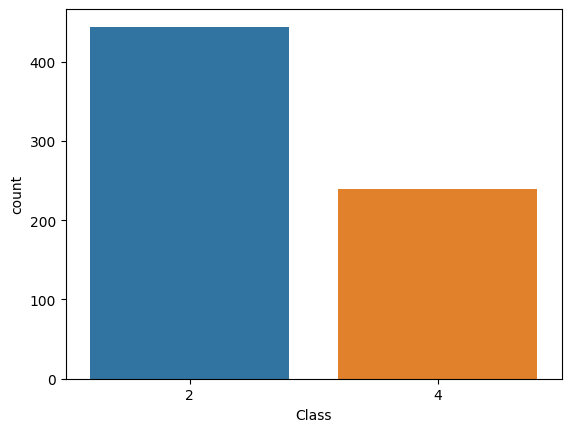

In [ ]:
sns.countplot(x = y1)
plt.show()

In [ ]:
dataset.value_counts()

Sample code number  Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class
704097              1                1                        1                         1                  1                            1            2                1                1        2        2
1100524             6                10                       10                        2                  8                            10           7                3                3        4        2
1218860             1                1                        1                         1                  1                            1            3                1                1        2        2
466906              1                1                        1                         1                  2                            1            1                1                1        2

In [ ]:
dataset.shape

(683, 11)

# Splitting the Dataset in Train and Test for Model Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
x_train

array([[ 752904,      10,       1, ...,       5,       4,       1],
       [1218860,       1,       1, ...,       3,       1,       1],
       [ 411453,       5,       1, ...,       3,       1,       1],
       ...,
       [1214092,       1,       1, ...,       1,       1,       1],
       [1303489,       3,       1, ...,       2,       1,       1],
       [ 378275,      10,       9, ...,       7,       7,       1]])

In [ ]:
x_test

array([[1173347,       1,       1, ...,       1,       1,       1],
       [1156017,       3,       1, ...,       2,       1,       1],
       [ 706426,       5,       5, ...,       4,       3,       1],
       ...,
       [ 369565,       4,       1, ...,       1,       1,       1],
       [1313325,       4,      10, ...,       9,      10,       1],
       [1136142,       2,       1, ...,       2,       1,       1]])

# Feature scaling on Independant and independant variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Training Model on Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(random_state=0)
lrm.fit(x_train,y_train)

LogisticRegression(random_state=0)

# Prediction on Test Data

In [ ]:
y_pred = lrm.predict(x_test)

# Compairing Value of Predict and Test Data

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]]


# Calculating the Accuracy Score and Confusion Metrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[84  3]
 [ 3 47]]


0.9562043795620438

# Training Model on KNN Classifier



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knc.fit(x_train,y_train)

KNeighborsClassifier()

# Predicting value on Testing Data

In [ ]:
y_pred2 = knc.predict(x_test)

# Compairing Both Testing and Predicting Value

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]]


# Calculating Confusion Matrix and Accuracy Score on KNN Classifier

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm2 = confusion_matrix(y_pred2,y_test)
print(cm2)
accuracy_score(y_pred2,y_test)

[[83  2]
 [ 4 48]]


0.9562043795620438

# Training Model on Support Vector CLassifrier

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel ='rbf',random_state=0)
svc.fit(x_train,y_train)

SVC(random_state=0)

# Predicting Value and Compairing with Test Value

In [ ]:
y_pred3 = svc.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]]


# Calculating the Accuracy Score and Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm3 = confusion_matrix(y_pred3,y_test)
print(cm3)
accuracy_score(y_pred3,y_test)

[[82  1]
 [ 5 49]]


0.9562043795620438

# Training the Model on Support Scaler Vector on Linear

In [ ]:
from sklearn.svm import SVC
svcl = SVC(kernel='linear',random_state=0)
svcl.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

# Calculating the Prediction on Accuracy Score on Support Vector on Kernal (Linear)

In [ ]:
y_pred4 = svc.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
cm4 = confusion_matrix(y_pred4,y_test)
print(cm4)
accuracy_score(y_pred4,y_test)

[[82  1]
 [ 5 49]]


0.9562043795620438

# Training Model On Naive Bayes Classifiers

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

# Prediction on Training Data and Calculation of Accuracy and COnfusion Metrix

In [ ]:
y_pred5 = nbc.predict(x_test)
cm5=confusion_matrix(y_pred5,y_test)
print(cm5)
accuracy_score(y_pred5,y_test)

[[80  1]
 [ 7 49]]


0.9416058394160584

# Traininig Model on Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting on Test data and Calculating Accuracy Score and Confusion Metrix

In [ ]:
y_pred6 = dtc.predict(x_test)
cm6 = confusion_matrix(y_pred6,y_test)
print(cm6)
accuracy_score(y_pred6,y_test)

[[84  3]
 [ 3 47]]


0.9562043795620438

# Training Model on Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

# Predicting Test Data and Calculating the Accuracy Score and Confusion Metrix

In [ ]:
y_pred7 = rfc.predict(x_test)
cm7 = confusion_matrix(y_pred7,y_test)
print(cm7)
accuracy_score(y_pred7,y_test)

[[84  1]
 [ 3 49]]


0.9708029197080292

In [ ]:
r7 = accuracy_score(y_pred7,y_test)